In [1]:
#%matplotlib inline
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

## I. Visualisation de la base "Iris de Fisher"

Dans cette première partie du TP, nous allons exploiter la base de données "Iris de Fisher" accessible via sklearn. 



Cette base fait appel à une variété de fleurs. Iris Fisher Database : https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
from sklearn.datasets import load_iris

# Reading the Iris.csv file
iris = load_iris()

# Print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# Print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# Print the iris data (top 11 records)
print(iris.data[0:12])

# Print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

# Examples in each class 
print("n_samples per class: %s" % np.bincount(iris.target))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
n_samples per class: [50 50 50]


### <font color='red'>*Q1: Déterminer les attributs, les classes et le nombre d'échantillon par classe.*</font>








In [4]:
# Create a DataFrame of the iris dataset
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head(12)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
# Extract Attributes / Features
X = iris.data

# Extract Target / Class Labels
y = iris.target

#Some statistics on the data
data.describe()


,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


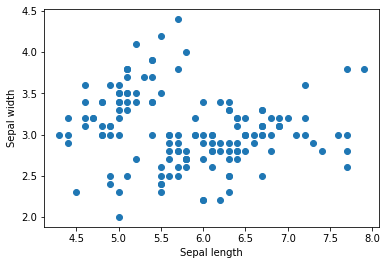

In [6]:
# Visualize some attributes
plt.scatter(data['sepal length'],data['sepal width'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

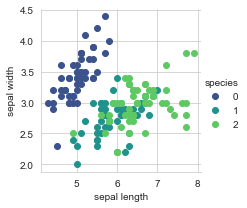

In [7]:
#(0:setosa, 1:versicolor, 2:virginica)
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='species', palette="viridis")\
   .map(plt.scatter,'sepal length','sepal width')\
   .add_legend()
plt.show


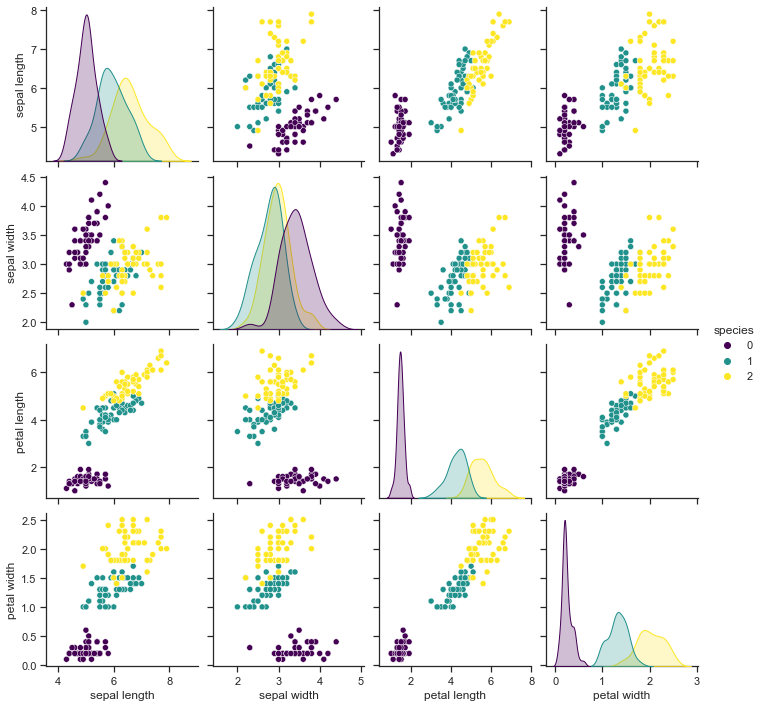

In [8]:
# Plot all pairs
sns.set(style="ticks", color_codes=False)
g=sns.pairplot(data, hue='species', palette="viridis")

On remarque qu'il y a une meilleure séparation sur le pétal width. L'espèce setosa est plus facilement séparable avec une combinaison de variables. Pour les deux autres beaucoup d'overlap, tout va dépendre du choix des variables de séparation.

### <font color='red'>*Q2 : Qu'observez-vous sur les attributs en termes de séparabilité des classes?*</font>




# II. Classification avec les Arbres de Décision


## II.1. En utilisant les hyperparamètres par défaut

### II.1.a. Construction de l'arbre

[Ellipsis]

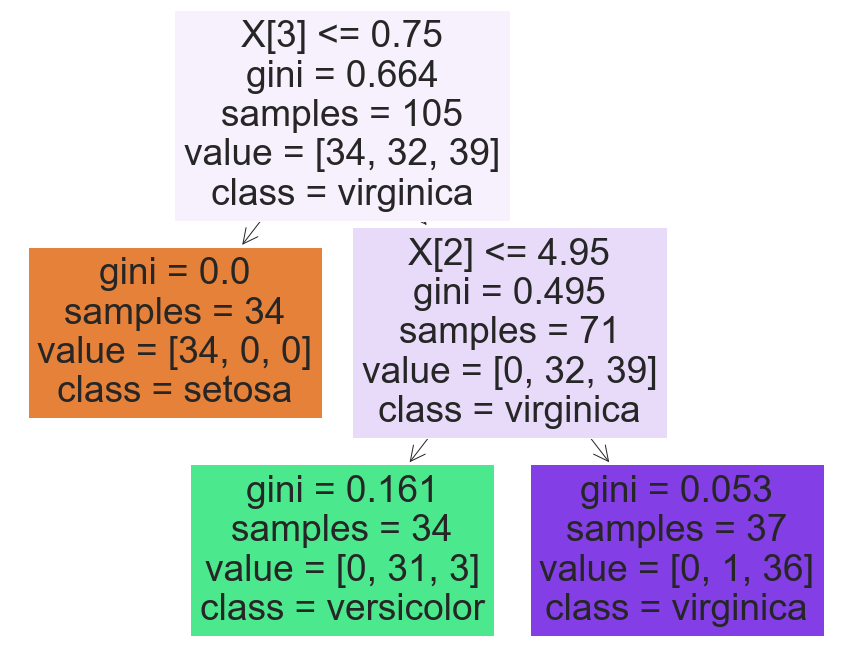

In [24]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Create Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) # 70% training and 30% test

# Create Decision Tree Classifier on train dataset
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

#Visualize the tree after training
plt.figure(figsize=(15,12))
tree.plot_tree(clf, class_names=iris.target_names, filled=True)
[...]

A chaque noeud je teste une variable, si elle est vérifier je passe à la suivante. On se base sur cette séparation, avec les étiquettes ! On cherche à arriver aux noeuds terminaux les plus propres possibles.

### <font color='red'>*Q3 : Interpréter finement l'arbre de décision obtenu, et cela à chaque profondeu.*</font>
### <font color='red'>*Q4 : Que peut-on déduire sur la qualité de l'arbre ?*</font>

### II.1.b. Après la construction de l'arbre, le modèle peut être utilisé pour la prédiction

In [25]:
from sklearn.metrics import accuracy_score

# Predict Accuracy Score on test dataset
y_pred = clf.predict(X_test)

print("Train data accuracy:",round(100*accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)),3),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)),"%")

Train data accuracy: 96.19 %
Test data accuracy: 91.111 %


In [26]:
# Classification of three new data 

species_idx1 = clf.predict([[5, 3, 1.4, 0.2]])[0]
print("Species 1:", iris.target_names[species_idx1])

species_idx2 = clf.predict([[3, 5, 4, 2]])[0]
print("Species 2:", iris.target_names[species_idx2])

species_idx3 = clf.predict([[6, 2, 0.4, 1.2]])[0]
print("Species 3:", iris.target_names[species_idx3])

species_idx4 = clf.predict([[6, 2, 0.4, 3]])[0]
print("Species 4:", iris.target_names[species_idx4])

Species 1: setosa
Species 2: versicolor
Species 3: versicolor
Species 4: versicolor


c:\Users\charl\AppData\Local\Anaconda3\envs\IA-tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\charl\AppData\Local\Anaconda3\envs\IA-tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\charl\AppData\Local\Anaconda3\envs\IA-tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\charl\AppData\Local\Anaconda3\envs\IA-tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### <font color='red'>*Q5 : Pour ces quatre exemples de test, montrer le processus de classification à travers les différentes couches de l'arbre (le chemin de décision)*</font>

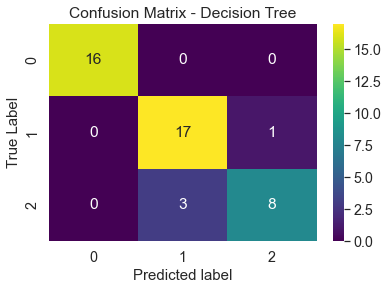

<Figure size 144x144 with 0 Axes>

In [27]:
from sklearn import metrics
# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            y_pred)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(2,2))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()


## II.2. En fixant certains hyperparamètres

### <font color='red'>*Q6 : Appliquer différentes valeurs aux hyperparamètres de l'arbre ("max_depth", "min_samples_split", et "criterion") et analyser leur impact.*</font>

### <font color='red'>*Q7 : Etudier l'impact de la prise en compte de 80%, 70%, 50% et 20% de la base en apprentissage.*</font>

[Ellipsis]

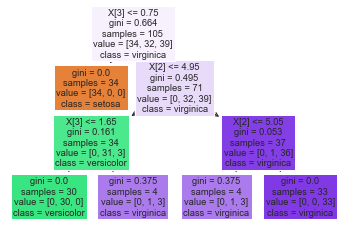

In [13]:
# You can change the size of the training dataset 80%, 70%, 50%, 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) # 70% training and 30% test

# Create Decision Tree Classifier by specifying some parametrs
clf = tree.DecisionTreeClassifier(min_samples_split = 10, criterion="gini")
#clf = tree.DecisionTreeClassifier(max_leaf_nodes=2,max_depth = 3,min_samples_leaf = 20, criterion="entropy", min_samples_split = 20)
clf.fit(X_train, y_train)

# Visualize the tree after training
tree.plot_tree(clf, class_names=iris.target_names, filled=True)
[...]

In [14]:
# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:","%.3f" %(100*accuracy_score(y_true = y_train, y_pred=clf.predict(X_train))),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)),"%")



Train data accuracy: 98.095 %
Test data accuracy: 97.778 %


## III. Classification avec les Forêts Aléatoires (Random Forest)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) 

#Create the Classifier
clf=RandomForestClassifier(n_estimators=100) #By default: n_estimators=100, min_samples_split=2

#Train the model using the training sets 
clf.fit(X_train,y_train)

#Classification of test data
y_pred=clf.predict(X_test)

#Visualize the tree after training
#tree.plot_tree(clf, class_names=iris.target_names, filled=True)
#[...]

# Print the Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:","%.3f" %(100*accuracy_score(y_true = y_train, y_pred=clf.predict(X_train))),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)),"%")

Train data accuracy: 100.000 %
Test data accuracy: 97.778 %


### <font color='red'>*Q8 : Comparer les résultats de classification à ceux obtenus avec l'arbre de décision et expliquer.*</font>

### <font color='red'>*Q9 : Etudier l'impact du nombre d'arbres et de la taille de la base d'apprentissage. Interpréter les résultats en termes de taux de bonne classification et matrice de confusion*</font>

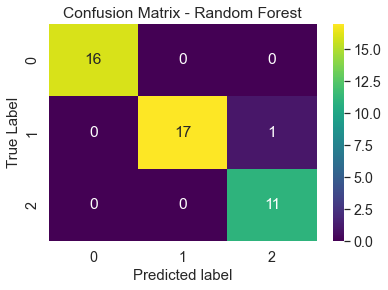

<Figure size 144x144 with 0 Axes>

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            y_pred)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(2,2))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")#set axis titles
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()

In [30]:
species_idx1 = clf.predict([[5, 3, 1.4, 0.2]])[0]
print("Species 1:", iris.target_names[species_idx1])

species_idx2 = clf.predict([[3, 5, 4, 2]])[0]
print("Species 2:", iris.target_names[species_idx2])

species_idx3 = clf.predict([[6, 2, 0.4, 1.2]])[0]
print("Species 3:", iris.target_names[species_idx3])

species_idx4 = clf.predict([[6, 2, 0.4, 3]])[0]
print("Species 4:", iris.target_names[species_idx4])

Species 1: setosa
Species 2: virginica
Species 3: versicolor
Species 4: setosa


c:\Users\charl\AppData\Local\Anaconda3\envs\IA-tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\charl\AppData\Local\Anaconda3\envs\IA-tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\charl\AppData\Local\Anaconda3\envs\IA-tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\charl\AppData\Local\Anaconda3\envs\IA-tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## IV. Identification des attributs les plus pertinents (sélection de variables)

### Utiliser les forêts aléatoires pour sélectionner les descripteurs les plus pertinents pour la classification

### <font color='red'>*Q10 : Interpréter les résultats à la base des observations obtenues à la Section I.*</font>


In [32]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.482195
petal width (cm)     0.387354
sepal length (cm)    0.103220
sepal width (cm)     0.027231
dtype: float64

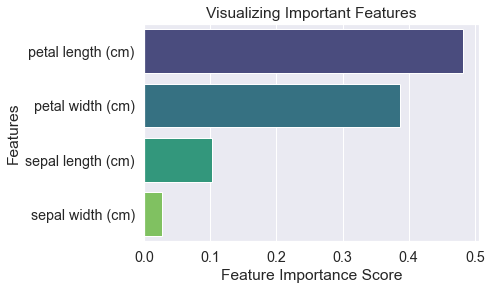

In [33]:
# Create bar plot of feature importance score
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## V. Evaluer le pouvoir descriminant de ces variables sélectionnées
### Choisir les variables et évaluer les performances de classification

In [38]:
# Choose the attributes !!! Prendre une ou plusieur variables et voir les résultats
#X=data[['sepal length', 'sepal width', 'petal length']] 
X=data[['petal width']]


y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) # 70% training and 30% test

# Create the Classifier
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Prediction on test set
y_pred=clf.predict(X_test)

# Predict Accuracy Score, how often is the classifier correct?
y_pred = clf.predict(X_test)
print("Train data accuracy:","%.3f" %(100*accuracy_score(y_true = y_train, y_pred=clf.predict(X_train))),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)),"%")

Train data accuracy: 95.238 %
Test data accuracy: 97.778 %


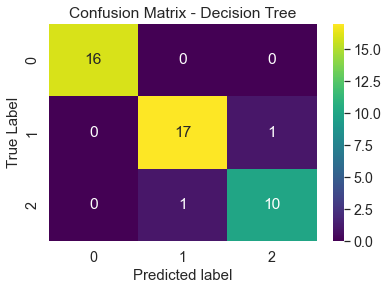

<Figure size 720x504 with 0 Axes>

In [35]:
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            y_pred)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()